In [1]:
from matplotlib import pyplot as plt
from matplotlib import dates
from datetime import datetime
import numpy as np
import sys

start_time=np.datetime64('2017-08-02 02:37:34')

# Read lsi:
f=open("lsi_clicks.txt","r")

lsi_clicks=[]
for line in f.readlines():
    line=line.strip()
    if '2017' in line:
        if np.datetime64(line) >= start_time:
            lsi_clicks.append(line)
f.close()

lsi_clicks=np.array(lsi_clicks,dtype='datetime64')

# Read lda:
f=open("lda_clicks.txt","r")

lda_clicks=[]
for line in f.readlines():
    line=line.strip()
    if '2017' in line:
        if np.datetime64(line) >= start_time:
            lda_clicks.append(line)
f.close()

lda_clicks=np.array(lda_clicks,dtype='datetime64')

In [2]:
#Get time relative to first in hours:
s2h=1./60

#Get first timestamp:
min_timestamp=np.min(np.append(lsi_clicks,lda_clicks))
lsi_rel_clicks=lsi_clicks-min_timestamp
lda_rel_clicks=lda_clicks-min_timestamp


#Convert to hours:
lsi_clicks_h=np.array(lsi_rel_clicks,dtype=np.float)/60.0/60.0
lda_clicks_h=np.array(lda_rel_clicks,dtype=np.float)/60.0/60.0


In [3]:
# Y axix is just counts:
counts_lsi=[]
for i in range(len(lsi_clicks_h)):
    counts_lsi.append(i+1)
counts_lsi=np.array(counts_lsi)

counts_lda=[]
for i in range(len(lda_clicks_h)):
    counts_lda.append(i+1)
counts_lda=np.array(counts_lda)

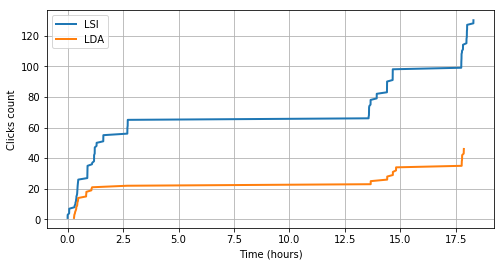

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('Clicks count')
ax.set_xlabel('Time (hours)')
ax.grid(True)
ax.plot(lsi_clicks_h,counts_lsi, linewidth=2, label='LSI')
ax.plot(lda_clicks_h,counts_lda, linewidth=2, label='LDA')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

fig.set_size_inches(8, 4)
plt.show()
#plt.savefig('temperatures.pdf', format='pdf')